In [2]:
!pwd

/c/Users/zoeyc/Desktop/Group_Project_1UCI-Data-Analytics-Bootcamp-2020---Team-Project-1/MO Codes and Collisions


In [3]:
#import dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
collision_data_path = "../Resources/Cleaned_5Year.csv"
heatmap_path = "../Resources/HeatBins.csv"

# Read the data
collision_data_df = pd.read_csv(collision_data_path, sep=',')
hotspot_data_df = pd.read_csv(heatmap_path, sep=',')
hotspot_data_df.head(11)

,Location,Lat,Lon,Count
0,"(34.1831, -118.3856)",34.1831,-118.3856,11
1,"(34.1831, -118.3878)",34.1831,-118.3878,11
2,"(34.2012, -118.3866)",34.2012,-118.3866,13
3,"(34.1577, -118.3834)",34.1577,-118.3834,6
4,"(34.1875, -118.3921)",34.1875,-118.3921,7
5,"(34.2085, -118.3769)",34.2085,-118.3769,5
6,"(34.2058, -118.3878)",34.2058,-118.3878,17
7,"(34.1687, -118.3615)",34.1687,-118.3615,24
8,"(34.1903, -118.3965)",34.1903,-118.3965,21
9,"(34.2048, -118.3703)",34.2048,-118.3703,16


In [4]:
top10_series_df =hotspot_data_df.sort_values('Count',ascending = False).head(10)
top10_series_df.head(10)

,Location,Lat,Lon,Count
144,"(34.2012, -118.4052)",34.2012,-118.4052,165
116,"(34.2012, -118.4138)",34.2012,-118.4138,137
136,"(34.1867, -118.3703)",34.1867,-118.3703,123
282,"(34.2012, -118.4094)",34.2012,-118.4094,107
38,"(34.1867, -118.4052)",34.1867,-118.4052,100
11,"(34.1867, -118.4137)",34.1867,-118.4137,99
295,"(34.1867, -118.3965)",34.1867,-118.3965,99
260,"(34.2012, -118.3878)",34.2012,-118.3878,99
218,"(34.2012, -118.4225)",34.2012,-118.4225,88
225,"(34.1649, -118.3704)",34.1649,-118.3704,88


In [5]:
#reindex
top10_series_df.index=range(len(top10_series_df))
top10_series_df

,Location,Lat,Lon,Count
0,"(34.2012, -118.4052)",34.2012,-118.4052,165
1,"(34.2012, -118.4138)",34.2012,-118.4138,137
2,"(34.1867, -118.3703)",34.1867,-118.3703,123
3,"(34.2012, -118.4094)",34.2012,-118.4094,107
4,"(34.1867, -118.4052)",34.1867,-118.4052,100
5,"(34.1867, -118.4137)",34.1867,-118.4137,99
6,"(34.1867, -118.3965)",34.1867,-118.3965,99
7,"(34.2012, -118.3878)",34.2012,-118.3878,99
8,"(34.2012, -118.4225)",34.2012,-118.4225,88
9,"(34.1649, -118.3704)",34.1649,-118.3704,88


In [6]:
#do a loc based on the location in the top 10 list from clean df.
hotspot1_df = collision_data_df.loc[collision_data_df['Location']== '(34.2012, -118.4052)']
hotspot2_df = collision_data_df.loc[collision_data_df['Location']== '(34.2012, -118.4138)']
hotspot3_df = collision_data_df.loc[collision_data_df['Location']== '(34.1867, -118.3703)']
hotspot4_df = collision_data_df.loc[collision_data_df['Location']== '(34.2012, -118.4094)']
hotspot5_df = collision_data_df.loc[collision_data_df['Location']== '(34.1867, -118.4052)']
hotspot6_df = collision_data_df.loc[collision_data_df['Location']== '(34.1867, -118.4137)']
hotspot7_df = collision_data_df.loc[collision_data_df['Location']== '(34.1867, -118.3965)']
hotspot8_df = collision_data_df.loc[collision_data_df['Location']== '(34.2012, -118.3878)']
hotspot9_df = collision_data_df.loc[collision_data_df['Location']== '(34.2012, -118.4225)']
hotspot10_df = collision_data_df.loc[collision_data_df['Location']== '(34.1649, -118.3704)']
hotspot10_df

,DR Number,Date Reported,Date Occurred,Time Occurred,Reporting District,Address,Cross Street,Location,MO Codes,Lat,Lon
263,171510170,4/15/2017,2017-04-15,2015,1555,VINELAND AV,MAGNOLIA BL,"(34.1649, -118.3704)",3004 3036 3602 3026 3101 3401 3701 4026,34.1649,-118.3704
387,191508303,3/25/2019,2019-03-24,1940,1555,MAGNOLIA BL,VINELAND AV,"(34.1649, -118.3704)",3101 3004 3037 3030 3028 3401 3701 4026,34.1649,-118.3704
588,181510268,4/29/2018,2018-04-29,1330,1555,VINELAND AV,MAGNOLIA BL,"(34.1649, -118.3704)",3602 3004 3036 3026 3101 3401 3701 4026,34.1649,-118.3704
609,181517030,8/30/2018,2018-08-30,1610,1548,MAGNOLIA BL,VINELAND ST,"(34.1649, -118.3704)",3101 3004 3037 3030 3026 3401 3701 4026,34.1649,-118.3704
695,191510322,5/2/2019,2019-03-13,1010,1555,MAGNOLIA BL,VINELAND AV,"(34.1649, -118.3704)",3004 3030 3028 3101 3401 3701 4015 3036,34.1649,-118.3704
...,...,...,...,...,...,...,...,...,...,...,...
11891,161512363,6/1/2016,2016-06-01,2245,1548,VINELAND AV,MAGNOLIA BL,"(34.1649, -118.3704)",3004 3030 3028 3101 3401 3701 4015 3037,34.1649,-118.3704
12475,171513034,6/5/2017,2017-06-05,1315,1555,MAGNOLIA BL,VINELAND AV,"(34.1649, -118.3704)",0605 3004 3037 3026 3101 3401 3701 4015,34.1649,-118.3704
12591,171506195,2/4/2017,2017-02-04,1530,1557,MAGNOLIA BL,VINELAND AV,"(34.1649, -118.3704)",3006 3030 3028 3102 3401 3701 4015 3037,34.1649,-118.3704
12629,161510905,5/4/2016,2016-05-04,1605,1555,MAGNOLIA BL,VINELAND AV,"(34.1649, -118.3704)",3011 3037 3030 3034 3028 3101 3401 3701 4026,34.1649,-118.3704


In [7]:
#reindex them all

hotspot1_df.index=range(len(hotspot1_df))
hotspot2_df.index=range(len(hotspot2_df))
hotspot3_df.index=range(len(hotspot3_df))
hotspot4_df.index=range(len(hotspot4_df))
hotspot5_df.index=range(len(hotspot5_df))
hotspot6_df.index=range(len(hotspot6_df))
hotspot7_df.index=range(len(hotspot7_df))
hotspot8_df.index=range(len(hotspot8_df))
hotspot9_df.index=range(len(hotspot9_df))
hotspot10_df.index=range(len(hotspot10_df))
hotspot1_df

,DR Number,Date Reported,Date Occurred,Time Occurred,Reporting District,Address,Cross Street,Location,MO Codes,Lat,Lon
0,191521665,12/6/2019,2019-12-06,2215,1513,SHERMAN WY,WHITSETT AV,"(34.2012, -118.4052)",3006 3025 3037 3101 4015,34.2012,-118.4052
1,161513566,6/22/2016,2016-06-22,1130,1513,SHERMAN WY,WHITSETT AV,"(34.2012, -118.4052)",3004 3037 3030 3028 3101 3401 3701 4026,34.2012,-118.4052
2,161513567,6/22/2016,2016-06-22,1135,1513,SHERMAN WY,WHITSETT AV,"(34.2012, -118.4052)",3004 3037 3030 3028 3101 3401 3701 4026,34.2012,-118.4052
3,151514680,7/10/2015,2015-07-09,1850,1513,WHITSETT AV,SHERMAN WY,"(34.2012, -118.4052)",3004 3037 3025 3101 3401 3701 4026 3602,34.2012,-118.4052
4,181515320,7/30/2018,2018-07-30,35,1513,SHERMAN WY,WHITSETT AV,"(34.2012, -118.4052)",3004 3037 3030 3028 3101 3401 3701 4026,34.2012,-118.4052
...,...,...,...,...,...,...,...,...,...,...,...
160,161507243,2/27/2016,2016-02-27,1700,1513,WHITSETT AV,SHERMAN WY,"(34.2012, -118.4052)",3006 3032 3037 3030 3028 3102 3401 3701 4015,34.2012,-118.4052
161,181518823,10/2/2018,2018-10-01,2005,1513,WHITSETT AV,SHERMAN WY,"(34.2012, -118.4052)",3004 3037 3602 3034 3025 3101 3401 3701 4026 3002,34.2012,-118.4052
162,181517988,9/17/2018,2018-09-12,2130,1513,WHITSETT AV,SHERMAN WY,"(34.2012, -118.4052)",3006 3025 3037 3101 3401 3701 4015,34.2012,-118.4052
163,161522693,12/7/2016,2016-12-06,2250,1513,WHITSETT AV,SHERMAN WY,"(34.2012, -118.4052)",3006 3037 3025 3101 3401 3701 4026,34.2012,-118.4052


In [8]:
#convert MO strings into lists 
hotspot1_df['MO Codes'] = hotspot1_df['MO Codes'].values.tolist()
hotspot2_df['MO Codes'] = hotspot2_df['MO Codes'].values.tolist()
hotspot3_df['MO Codes'] = hotspot3_df['MO Codes'].values.tolist()
hotspot4_df['MO Codes'] = hotspot4_df['MO Codes'].values.tolist()
hotspot5_df['MO Codes'] = hotspot5_df['MO Codes'].values.tolist()
hotspot6_df['MO Codes'] = hotspot6_df['MO Codes'].values.tolist()
hotspot7_df['MO Codes'] = hotspot7_df['MO Codes'].values.tolist()
hotspot8_df['MO Codes'] = hotspot8_df['MO Codes'].values.tolist()
hotspot9_df['MO Codes'] = hotspot9_df['MO Codes'].values.tolist()
hotspot10_df['MO Codes'] = hotspot10_df['MO Codes'].values.tolist()

C:\Users\zoeyc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\zoeyc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zoeyc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [9]:
#use this cell to check and make sure all dfs are running ok
hotspot10_df

,DR Number,Date Reported,Date Occurred,Time Occurred,Reporting District,Address,Cross Street,Location,MO Codes,Lat,Lon
0,171510170,4/15/2017,2017-04-15,2015,1555,VINELAND AV,MAGNOLIA BL,"(34.1649, -118.3704)",3004 3036 3602 3026 3101 3401 3701 4026,34.1649,-118.3704
1,191508303,3/25/2019,2019-03-24,1940,1555,MAGNOLIA BL,VINELAND AV,"(34.1649, -118.3704)",3101 3004 3037 3030 3028 3401 3701 4026,34.1649,-118.3704
2,181510268,4/29/2018,2018-04-29,1330,1555,VINELAND AV,MAGNOLIA BL,"(34.1649, -118.3704)",3602 3004 3036 3026 3101 3401 3701 4026,34.1649,-118.3704
3,181517030,8/30/2018,2018-08-30,1610,1548,MAGNOLIA BL,VINELAND ST,"(34.1649, -118.3704)",3101 3004 3037 3030 3026 3401 3701 4026,34.1649,-118.3704
4,191510322,5/2/2019,2019-03-13,1010,1555,MAGNOLIA BL,VINELAND AV,"(34.1649, -118.3704)",3004 3030 3028 3101 3401 3701 4015 3036,34.1649,-118.3704
...,...,...,...,...,...,...,...,...,...,...,...
83,161512363,6/1/2016,2016-06-01,2245,1548,VINELAND AV,MAGNOLIA BL,"(34.1649, -118.3704)",3004 3030 3028 3101 3401 3701 4015 3037,34.1649,-118.3704
84,171513034,6/5/2017,2017-06-05,1315,1555,MAGNOLIA BL,VINELAND AV,"(34.1649, -118.3704)",0605 3004 3037 3026 3101 3401 3701 4015,34.1649,-118.3704
85,171506195,2/4/2017,2017-02-04,1530,1557,MAGNOLIA BL,VINELAND AV,"(34.1649, -118.3704)",3006 3030 3028 3102 3401 3701 4015 3037,34.1649,-118.3704
86,161510905,5/4/2016,2016-05-04,1605,1555,MAGNOLIA BL,VINELAND AV,"(34.1649, -118.3704)",3011 3037 3030 3034 3028 3101 3401 3701 4026,34.1649,-118.3704


In [10]:
#dummy = pd.get_dummies(hotspot1_df['MO Codes'], sep=" ") 
df1=hotspot1_df['MO Codes'].str.get_dummies(sep=' ')
df2=hotspot2_df['MO Codes'].str.get_dummies(sep=' ')
df3=hotspot3_df['MO Codes'].str.get_dummies(sep=' ')
df4=hotspot4_df['MO Codes'].str.get_dummies(sep=' ')
df5=hotspot5_df['MO Codes'].str.get_dummies(sep=' ')
df6=hotspot6_df['MO Codes'].str.get_dummies(sep=' ')
df7=hotspot7_df['MO Codes'].str.get_dummies(sep=' ')
df8=hotspot8_df['MO Codes'].str.get_dummies(sep=' ')
df9=hotspot9_df['MO Codes'].str.get_dummies(sep=' ')
df10=hotspot10_df['MO Codes'].str.get_dummies(sep=' ')

In [11]:
#use this cell to verify MO Codes have been split
hotspot1_df

,DR Number,Date Reported,Date Occurred,Time Occurred,Reporting District,Address,Cross Street,Location,MO Codes,Lat,Lon
0,191521665,12/6/2019,2019-12-06,2215,1513,SHERMAN WY,WHITSETT AV,"(34.2012, -118.4052)",3006 3025 3037 3101 4015,34.2012,-118.4052
1,161513566,6/22/2016,2016-06-22,1130,1513,SHERMAN WY,WHITSETT AV,"(34.2012, -118.4052)",3004 3037 3030 3028 3101 3401 3701 4026,34.2012,-118.4052
2,161513567,6/22/2016,2016-06-22,1135,1513,SHERMAN WY,WHITSETT AV,"(34.2012, -118.4052)",3004 3037 3030 3028 3101 3401 3701 4026,34.2012,-118.4052
3,151514680,7/10/2015,2015-07-09,1850,1513,WHITSETT AV,SHERMAN WY,"(34.2012, -118.4052)",3004 3037 3025 3101 3401 3701 4026 3602,34.2012,-118.4052
4,181515320,7/30/2018,2018-07-30,35,1513,SHERMAN WY,WHITSETT AV,"(34.2012, -118.4052)",3004 3037 3030 3028 3101 3401 3701 4026,34.2012,-118.4052
...,...,...,...,...,...,...,...,...,...,...,...
160,161507243,2/27/2016,2016-02-27,1700,1513,WHITSETT AV,SHERMAN WY,"(34.2012, -118.4052)",3006 3032 3037 3030 3028 3102 3401 3701 4015,34.2012,-118.4052
161,181518823,10/2/2018,2018-10-01,2005,1513,WHITSETT AV,SHERMAN WY,"(34.2012, -118.4052)",3004 3037 3602 3034 3025 3101 3401 3701 4026 3002,34.2012,-118.4052
162,181517988,9/17/2018,2018-09-12,2130,1513,WHITSETT AV,SHERMAN WY,"(34.2012, -118.4052)",3006 3025 3037 3101 3401 3701 4015,34.2012,-118.4052
163,161522693,12/7/2016,2016-12-06,2250,1513,WHITSETT AV,SHERMAN WY,"(34.2012, -118.4052)",3006 3037 3025 3101 3401 3701 4026,34.2012,-118.4052


In [12]:
hotspot1_df=hotspot1_df.join(df1)



#hotspot5_df=hotspot5_df.join(df5)
#hotspot6_df=hotspot6_df.join(df6)
#hotspot7_df=hotspot7_df.join(df7)
#hotspot8_df=hotspot8_df.join(df8)
#hotspot9_df=hotspot9_df.join(df9)
#hotspot10_df=hotspot10_df.join(df10)

In [13]:
hotspot1_df.head(3)

,DR Number,Date Reported,Date Occurred,Time Occurred,Reporting District,Address,Cross Street,Location,MO Codes,Lat,...,3039,3101,3102,3104,3401,3602,3701,4009,4015,4026
0,191521665,12/6/2019,2019-12-06,2215,1513,SHERMAN WY,WHITSETT AV,"(34.2012, -118.4052)",3006 3025 3037 3101 4015,34.2012,...,0,1,0,0,0,0,0,0,1,0
1,161513566,6/22/2016,2016-06-22,1130,1513,SHERMAN WY,WHITSETT AV,"(34.2012, -118.4052)",3004 3037 3030 3028 3101 3401 3701 4026,34.2012,...,0,1,0,0,1,0,1,0,0,1
2,161513567,6/22/2016,2016-06-22,1135,1513,SHERMAN WY,WHITSETT AV,"(34.2012, -118.4052)",3004 3037 3030 3028 3101 3401 3701 4026,34.2012,...,0,1,0,0,1,0,1,0,0,1


In [14]:
hotspot2_df=hotspot2_df.join(df2)

In [15]:
hotspot3_df=hotspot3_df.join(df3)

In [16]:
hotspot4_df=hotspot4_df.join(df4)

In [17]:
hotspot5_df=hotspot5_df.join(df5)

In [18]:
hotspot6_df=hotspot6_df.join(df6)

In [19]:
hotspot7_df=hotspot7_df.join(df7)

In [20]:
hotspot8_df=hotspot8_df.join(df8)

In [21]:
hotspot9_df=hotspot9_df.join(df9)

In [22]:
hotspot10_df=hotspot10_df.join(df10)

In [23]:
#use this cell to verify the join function
hotspot1_df

,DR Number,Date Reported,Date Occurred,Time Occurred,Reporting District,Address,Cross Street,Location,MO Codes,Lat,...,3039,3101,3102,3104,3401,3602,3701,4009,4015,4026
0,191521665,12/6/2019,2019-12-06,2215,1513,SHERMAN WY,WHITSETT AV,"(34.2012, -118.4052)",3006 3025 3037 3101 4015,34.2012,...,0,1,0,0,0,0,0,0,1,0
1,161513566,6/22/2016,2016-06-22,1130,1513,SHERMAN WY,WHITSETT AV,"(34.2012, -118.4052)",3004 3037 3030 3028 3101 3401 3701 4026,34.2012,...,0,1,0,0,1,0,1,0,0,1
2,161513567,6/22/2016,2016-06-22,1135,1513,SHERMAN WY,WHITSETT AV,"(34.2012, -118.4052)",3004 3037 3030 3028 3101 3401 3701 4026,34.2012,...,0,1,0,0,1,0,1,0,0,1
3,151514680,7/10/2015,2015-07-09,1850,1513,WHITSETT AV,SHERMAN WY,"(34.2012, -118.4052)",3004 3037 3025 3101 3401 3701 4026 3602,34.2012,...,0,1,0,0,1,1,1,0,0,1
4,181515320,7/30/2018,2018-07-30,35,1513,SHERMAN WY,WHITSETT AV,"(34.2012, -118.4052)",3004 3037 3030 3028 3101 3401 3701 4026,34.2012,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,161507243,2/27/2016,2016-02-27,1700,1513,WHITSETT AV,SHERMAN WY,"(34.2012, -118.4052)",3006 3032 3037 3030 3028 3102 3401 3701 4015,34.2012,...,0,0,1,0,1,0,1,0,1,0
161,181518823,10/2/2018,2018-10-01,2005,1513,WHITSETT AV,SHERMAN WY,"(34.2012, -118.4052)",3004 3037 3602 3034 3025 3101 3401 3701 4026 3002,34.2012,...,0,1,0,0,1,1,1,0,0,1
162,181517988,9/17/2018,2018-09-12,2130,1513,WHITSETT AV,SHERMAN WY,"(34.2012, -118.4052)",3006 3025 3037 3101 3401 3701 4015,34.2012,...,0,1,0,0,1,0,1,0,1,0
163,161522693,12/7/2016,2016-12-06,2250,1513,WHITSETT AV,SHERMAN WY,"(34.2012, -118.4052)",3006 3037 3025 3101 3401 3701 4026,34.2012,...,0,1,0,0,1,0,1,0,0,1


In [25]:
#use this cell to check hotspot counts 3003-3012
hotspot10_df.sum()

DR Number                                                   14813171868
Date Reported         4/15/20173/25/20194/29/20188/30/20185/2/201912...
Date Occurred         2017-04-152019-03-242018-04-292018-08-302019-0...
Time Occurred                                                    135927
Reporting District                                               136746
Address               VINELAND AVMAGNOLIA BLVINELAND AVMAGNOLIA BLMA...
Cross Street          MAGNOLIA BLVINELAND AVMAGNOLIA BLVINELAND STVI...
Location              (34.1649, -118.3704)(34.1649, -118.3704)(34.16...
MO Codes              3004 3036 3602 3026 3101 3401 3701 40263101 30...
Lat                                                             3006.51
Lon                                                            -10416.6
0605                                                                  6
1300                                                                  1
1501                                                            

In [76]:
hotspot1_MO3003 = hotspot1_df['3003'].sum()
hotspot1_MO3004 = hotspot1_df['3004'].sum()
hotspot1_MO3006 = hotspot1_df['3006'].sum()
hotspot1_MO3008 = hotspot1_df['3008'].sum()
hotspot1_MO3009 = hotspot1_df['3009'].sum()
hotspot1_MO3011 = hotspot1_df['3011'].sum()

hotspot2_MO3003 = hotspot2_df['3003'].sum()
hotspot2_MO3004 = hotspot2_df['3004'].sum()
hotspot2_MO3006 = hotspot2_df['3006'].sum()
hotspot2_MO3008 = hotspot2_df['3008'].sum()
hotspot2_MO3009 = hotspot2_df['3009'].sum()
hotspot2_MO3011 = hotspot2_df['3011'].sum()

hotspot3_MO3003 = hotspot3_df['3003'].sum()
hotspot3_MO3004 = hotspot3_df['3004'].sum()
#hotspot3_MO3005 = hotspot3_df['3005'].sum()
hotspot3_MO3006 = hotspot3_df['3006'].sum()
#hotspot3_MO3007 = hotspot3_df['3007'].sum()
hotspot3_MO3008 = hotspot3_df['3008'].sum()
hotspot3_MO3009 = hotspot3_df['3009'].sum()
#hotspot3_MO3010 = hotspot3_df['3010'].sum()
hotspot3_MO3011 = hotspot3_df['3011'].sum()
#hotspot3_MO3012 = hotspot3_df['3012'].sum()

hotspot4_MO3003 = hotspot4_df['3003'].sum()
hotspot4_MO3004 = hotspot4_df['3004'].sum()
hotspot4_MO3005 = hotspot4_df['3005'].sum()
hotspot4_MO3006 = hotspot4_df['3006'].sum()
#hotspot4_MO3007 = hotspot4_df['3007'].sum()
hotspot4_MO3008 = hotspot4_df['3008'].sum()
hotspot4_MO3009 = hotspot4_df['3009'].sum()
#hotspot4_MO3010 = hotspot4_df['3010'].sum()
hotspot4_MO3011 = hotspot4_df['3011'].sum()
#hotspot4_MO3012 = hotspot4_df['3012'].sum()

hotspot5_MO3003 = hotspot5_df['3003'].sum()
hotspot5_MO3004 = hotspot5_df['3004'].sum()
hotspot5_MO3005 = hotspot5_df['3005'].sum()
hotspot5_MO3006 = hotspot5_df['3006'].sum()
#hotspot5_MO3007 = hotspot5_df['3007'].sum()
hotspot5_MO3008 = hotspot5_df['3008'].sum()
#hotspot5_MO3009 = hotspot5_df['3009'].sum()
#hotspot5_MO3010 = hotspot5_df['3010'].sum()
hotspot5_MO3011 = hotspot5_df['3011'].sum()
#hotspot5_MO3012 = hotspot5_df['3012'].sum()

hotspot6_MO3003 = hotspot6_df['3003'].sum()
hotspot6_MO3004 = hotspot6_df['3004'].sum()
#hotspot6_MO3005 = hotspot6_df['3005'].sum()
hotspot6_MO3006 = hotspot6_df['3006'].sum()
#hotspot6_MO3007 = hotspot6_df['3007'].sum()
hotspot6_MO3008 = hotspot6_df['3008'].sum()
hotspot6_MO3009 = hotspot6_df['3009'].sum()
#hotspot6_MO3010 = hotspot6_df['3010'].sum()
#hotspot6_MO3011 = hotspot6_df['3011'].sum()
#hotspot6_MO3012 = hotspot6_df['3012'].sum()

hotspot7_MO3003 = hotspot7_df['3003'].sum()
hotspot7_MO3004 = hotspot7_df['3004'].sum()
#hotspot7_MO3005 = hotspot7_df['3005'].sum()
hotspot7_MO3006 = hotspot7_df['3006'].sum()
#hotspot7_MO3007 = hotspot7_df['3007'].sum()
hotspot7_MO3008 = hotspot7_df['3008'].sum()
hotspot7_MO3009 = hotspot7_df['3009'].sum()
#hotspot7_MO3010 = hotspot7_df['3010'].sum()
hotspot7_MO3011 = hotspot7_df['3011'].sum()
#hotspot7_MO3012 = hotspot7_df['3012'].sum()

hotspot8_MO3003 = hotspot8_df['3003'].sum()
hotspot8_MO3004 = hotspot8_df['3004'].sum()
hotspot8_MO3005 = hotspot8_df['3005'].sum()
hotspot8_MO3006 = hotspot8_df['3006'].sum()
#hotspot8_MO3007 = hotspot8_df['3007'].sum()
hotspot8_MO3008 = hotspot8_df['3008'].sum()
hotspot8_MO3009 = hotspot8_df['3009'].sum()
#hotspot8_MO3010 = hotspot8_df['3010'].sum()
hotspot8_MO3011 = hotspot8_df['3011'].sum()
#hotspot8_MO3012 = hotspot8_df['3012'].sum()

hotspot9_MO3003 = hotspot9_df['3003'].sum()
hotspot9_MO3004 = hotspot9_df['3004'].sum()
#hotspot9_MO3005 = hotspot9_df['3005'].sum()
hotspot9_MO3006 = hotspot9_df['3006'].sum()
#hotspot9_MO3007 = hotspot9_df['3007'].sum()
hotspot9_MO3008 = hotspot9_df['3008'].sum()
hotspot9_MO3009 = hotspot9_df['3009'].sum()
#hotspot9_MO3010 = hotspot9_df['3010'].sum()
hotspot9_MO3011 = hotspot9_df['3011'].sum()
#hotspot9_MO3012 = hotspot9_df['3012'].sum()

hotspot10_MO3003 = hotspot10_df['3003'].sum()
hotspot10_MO3004 = hotspot10_df['3004'].sum()
#hotspot10_MO3005 = hotspot10_df['3005'].sum()
hotspot10_MO3006 = hotspot10_df['3006'].sum()
#hotspot10_MO3007 = hotspot10_df['3007'].sum()
hotspot10_MO3008 = hotspot10_df['3008'].sum()
hotspot10_MO3009 = hotspot10_df['3009'].sum()
#hotspot10_MO3010 = hotspot10_df['3010'].sum()
hotspot10_MO3011 = hotspot10_df['3011'].sum()
#hotspot10_MO3012 = hotspot10_df['3012'].sum()
#do the rest of the hotspots 

In [77]:
summary1_df = pd.DataFrame({"MO 3003": hotspot1_MO3003, "MO 3004": hotspot1_MO3004, 
                            "MO 3006":hotspot1_MO3006, "MO 3008": hotspot1_MO3008, 
                           "MO 3009": hotspot1_MO3009, "MO 3011": hotspot1_MO3011,},
                 index=[""])
summary1_df

,MO 3003,MO 3004,MO 3006,MO 3008,MO 3009,MO 3011
,3,127,13,5,1,7


In [82]:
#Switching orientation with T function. 
#Update with MO names 
#Name the counts column
summary1_df = pd.DataFrame({"Veh vs Ped": hotspot1_MO3003, "Veh vs Veh": hotspot1_MO3004, 
                            "Veh vs Parked Veh":hotspot8_MO3006, "Veh vs Bike": hotspot8_MO3008, 
                           "Veh vs M/C": hotspot8_MO3009, "Veh vs Fixed Object": hotspot8_MO3011,},
                 index=[""]).T
updated1_df = summary1_df.rename(columns = {"" : "Counts"})
updated1_df

,Counts
Veh vs Ped,3
Veh vs Veh,127
Veh vs Parked Veh,11
Veh vs Bike,2
Veh vs M/C,2
Veh vs Fixed Object,4


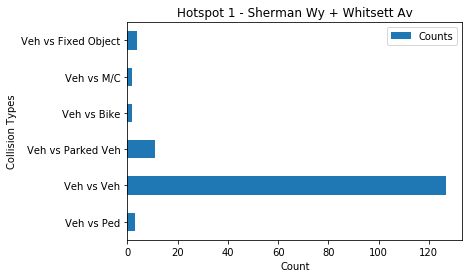

In [79]:
updated1_df.plot(kind="barh")
plt.title('Hotspot 1 - Sherman Wy + Whitsett Av')
plt.xlabel("Count")
plt.ylabel("Collision Types")
plt.show
plt.savefig("bar1.png", bbox_inches='tight', dpi=600)

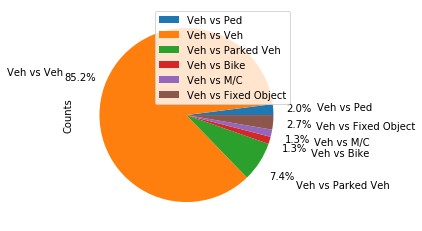

In [80]:
updated1_df.plot(kind="pie", subplots=True, autopct='%1.1F%%', pctdistance = 1.3, labeldistance = 1.5, legend = True)
plt.savefig("pie1.png", bbox_inches='tight', dpi=600)
plt.show()

In [37]:
summary2_df = pd.DataFrame({"Veh vs Ped": hotspot2_MO3003, "Veh vs Veh": hotspot2_MO3004, 
                            "Veh vs Parked Veh":hotspot2_MO3006, "Veh vs Bike": hotspot2_MO3008, 
                           "Veh vs M/C": hotspot2_MO3009, "Veh vs Fixed Object": hotspot2_MO3011},
                 index=[""]).T
updated2_df = summary2_df.rename(columns = {"" : "Counts"})
updated2_df

,Counts
Veh vs Ped,2
Veh vs Veh,102
Veh vs Parked Veh,18
Veh vs Bike,3
Veh vs M/C,2
Veh vs Fixed Object,5


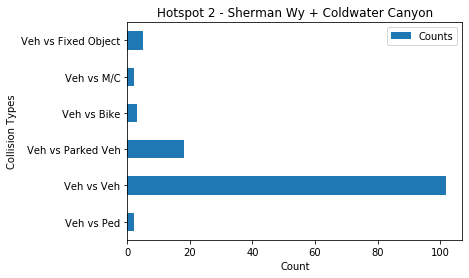

In [64]:
updated2_df.plot(kind="barh")
plt.title('Hotspot 2 - Sherman Wy + Coldwater Canyon')
plt.xlabel("Count")
plt.ylabel("Collision Types")
plt.show
plt.savefig("bar2.png", bbox_inches='tight', dpi=600)

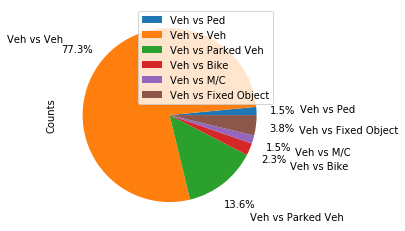

In [39]:
updated2_df.plot(kind="pie", subplots=True, autopct='%1.1F%%', pctdistance = 1.3, labeldistance = 1.5, legend = True)
plt.savefig("pie2.png", bbox_inches='tight', dpi=600)
plt.show()

In [40]:
summary3_df = pd.DataFrame({"Veh vs Ped": hotspot3_MO3003, "Veh vs Veh": hotspot3_MO3004, 
                            "Veh vs Parked Veh":hotspot3_MO3006, "Veh vs Bike": hotspot3_MO3008, 
                           "Veh vs M/C": hotspot3_MO3009, "Veh vs Fixed Object": hotspot3_MO3011,},
                 index=[""]).T
updated3_df = summary3_df.rename(columns = {"" : "Counts"})
updated3_df

,Counts
Veh vs Ped,15
Veh vs Veh,71
Veh vs Parked Veh,19
Veh vs Bike,6
Veh vs M/C,4
Veh vs Fixed Object,2


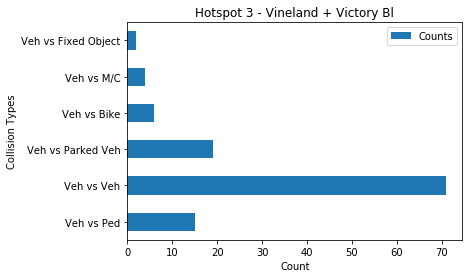

In [65]:
updated3_df.plot(kind="barh")
plt.title('Hotspot 3 - Vineland + Victory Bl')
plt.xlabel("Count")
plt.ylabel("Collision Types")
plt.show
plt.savefig("bar3.png", bbox_inches='tight', dpi=600)

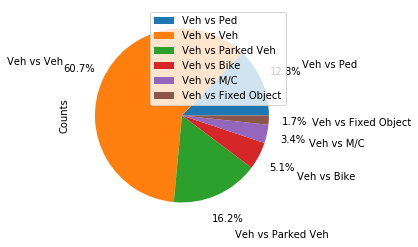

In [42]:
updated3_df.plot(kind="pie", subplots=True, autopct='%1.1F%%', pctdistance = 1.3, labeldistance = 1.5, legend = True)
plt.savefig("pie3.png", bbox_inches='tight', dpi=600)
plt.show()

In [43]:
summary4_df = pd.DataFrame({"Veh vs Ped": hotspot4_MO3003, "Veh vs Veh": hotspot4_MO3004,
                            "Veh vs Veh on other roadway": hotspot4_MO3005,
                            "Veh vs Parked Veh":hotspot4_MO3006, "Veh vs Bike": hotspot4_MO3008, 
                           "Veh vs M/C": hotspot4_MO3009, "Veh vs Fixed Object": hotspot4_MO3011},
                 index=[""]).T
updated4_df = summary4_df.rename(columns = {"" : "Counts"})
updated4_df

,Counts
Veh vs Ped,7
Veh vs Veh,73
Veh vs Veh on other roadway,1
Veh vs Parked Veh,19
Veh vs Bike,1
Veh vs M/C,3
Veh vs Fixed Object,1


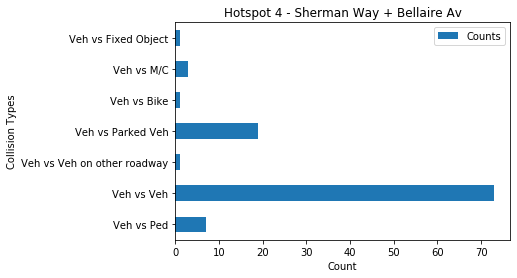

In [67]:
updated4_df.plot(kind="barh")
plt.title('Hotspot 4 - Sherman Way + Bellaire Av')
plt.xlabel("Count")
plt.ylabel("Collision Types")
plt.show
plt.savefig("bar4.png", bbox_inches='tight', dpi=600)

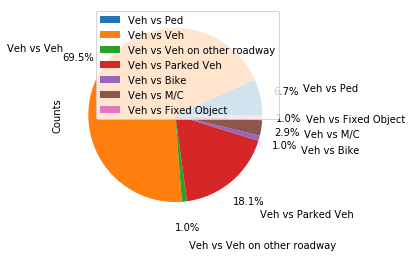

In [154]:
updated4_df.plot(kind="pie", subplots=True, autopct='%1.1F%%', pctdistance = 1.3, labeldistance = 1.5, legend = True)
plt.savefig("pie4.png", bbox_inches='tight', dpi=600)
plt.show()

In [45]:
summary5_df = pd.DataFrame({"Veh vs Ped": hotspot5_MO3003, "Veh vs Veh": hotspot5_MO3004,
                            "Veh vs Veh on other roadway": hotspot5_MO3005,
                            "Veh vs Parked Veh":hotspot5_MO3006, "Veh vs Bike": hotspot5_MO3008, 
                            "Veh vs Fixed Object": hotspot5_MO3011,},
                 index=[""]).T
updated5_df = summary5_df.rename(columns = {"" : "Counts"})
updated5_df


,Counts
Veh vs Ped,3
Veh vs Veh,83
Veh vs Veh on other roadway,1
Veh vs Parked Veh,8
Veh vs Bike,1
Veh vs Fixed Object,1


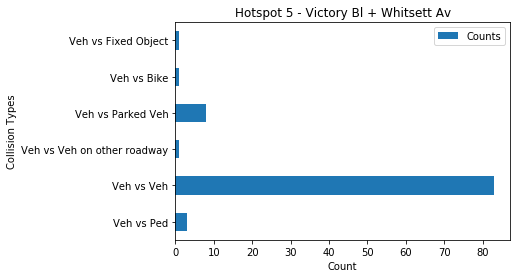

In [68]:
updated5_df.plot(kind="barh")
plt.title('Hotspot 5 - Victory Bl + Whitsett Av')
plt.xlabel("Count")
plt.ylabel("Collision Types")
plt.show
plt.savefig("bar5.png", bbox_inches='tight', dpi=600)

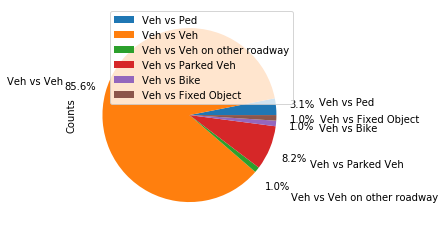

In [47]:
updated5_df.plot(kind="pie", subplots=True, autopct='%1.1F%%', pctdistance = 1.3, labeldistance = 1.5, legend = True)
plt.savefig("pie5.png", bbox_inches='tight', dpi=600)
plt.show()

In [48]:
summary6_df = pd.DataFrame({"Veh vs Ped": hotspot6_MO3003, "Veh vs Veh": hotspot6_MO3004,
                            "Veh vs Parked Veh":hotspot6_MO3006, "Veh vs Bike": hotspot6_MO3008, 
                            "Veh vs M/C": hotspot6_MO3006,},
                 index=[""]).T
updated6_df = summary6_df.rename(columns = {"" : "Counts"})
updated6_df

,Counts
Veh vs Ped,4
Veh vs Veh,75
Veh vs Parked Veh,11
Veh vs Bike,5
Veh vs M/C,11


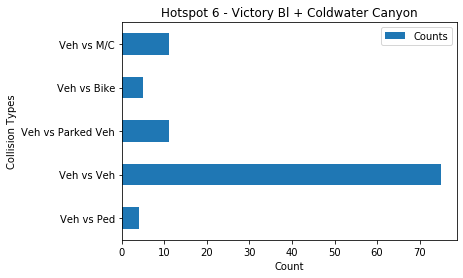

In [69]:
updated6_df.plot(kind="barh")
plt.title('Hotspot 6 - Victory Bl + Coldwater Canyon')
plt.xlabel("Count")
plt.ylabel("Collision Types")
plt.show
plt.savefig("bar6.png", bbox_inches='tight', dpi=600)

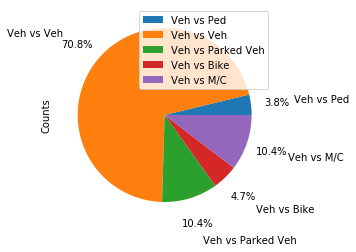

In [50]:
updated6_df.plot(kind="pie", subplots=True, autopct='%1.1F%%', pctdistance = 1.3, labeldistance = 1.5, legend = True)
plt.savefig("pie6.png", bbox_inches='tight', dpi=600)
plt.show()

In [51]:
summary7_df = pd.DataFrame({"Veh vs Ped": hotspot7_MO3003, "Veh vs Veh": hotspot7_MO3004, 
                            "Veh vs Parked Veh":hotspot7_MO3006, "Veh vs Bike": hotspot7_MO3008, 
                           "Veh vs M/C": hotspot7_MO3009, "Veh vs Fixed Object": hotspot7_MO3011,},
                 index=[""]).T
updated7_df = summary7_df.rename(columns = {"" : "Counts"})
updated7_df

,Counts
Veh vs Ped,10
Veh vs Veh,69
Veh vs Parked Veh,7
Veh vs Bike,5
Veh vs M/C,2
Veh vs Fixed Object,2


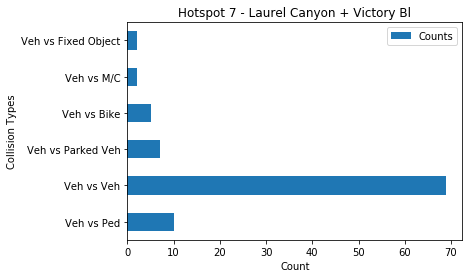

In [70]:
updated7_df.plot(kind="barh")
plt.title('Hotspot 7 - Laurel Canyon + Victory Bl')
plt.xlabel("Count")
plt.ylabel("Collision Types")
plt.show
plt.savefig("bar7.png", bbox_inches='tight', dpi=600)

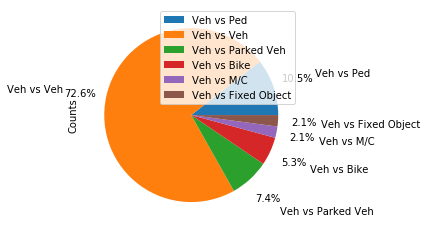

In [53]:
updated7_df.plot(kind="pie", subplots=True, autopct='%1.1F%%', pctdistance = 1.3, labeldistance = 1.5, legend = True)
plt.savefig("pie7.png", bbox_inches='tight', dpi=600)
plt.show()

In [54]:
summary8_df = pd.DataFrame({"Veh vs Ped": hotspot8_MO3003, "Veh vs Veh": hotspot8_MO3004, 
                            "Veh vs Veh on other roadway": hotspot8_MO3005,
                            "Veh vs Parked Veh":hotspot8_MO3006, "Veh vs Bike": hotspot8_MO3008, 
                           "Veh vs M/C": hotspot8_MO3009, "Veh vs Fixed Object": hotspot8_MO3011,},
                 index=[""]).T
updated8_df = summary8_df.rename(columns = {"" : "Counts"})
updated8_df

,Counts
Veh vs Ped,6
Veh vs Veh,70
Veh vs Veh on other roadway,1
Veh vs Parked Veh,11
Veh vs Bike,2
Veh vs M/C,2
Veh vs Fixed Object,4


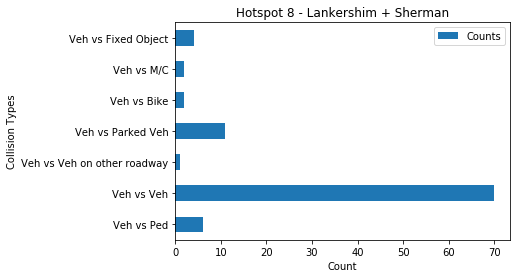

In [71]:
updated8_df.plot(kind="barh")
plt.title('Hotspot 8 - Lankershim + Sherman')
plt.xlabel("Count")
plt.ylabel("Collision Types")
plt.show
plt.savefig("bar8.png", bbox_inches='tight', dpi=600)

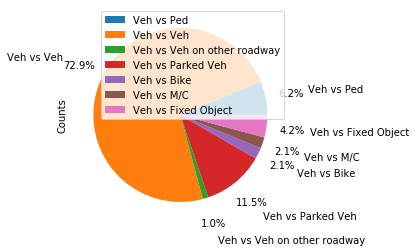

In [56]:
updated8_df.plot(kind="pie", subplots=True, autopct='%1.1F%%', pctdistance = 1.3, labeldistance = 1.5, legend = True)
plt.savefig("pie8.png", bbox_inches='tight', dpi=600)
plt.show()

In [57]:
summary9_df = pd.DataFrame({"Veh vs Ped": hotspot9_MO3003, "Veh vs Veh": hotspot9_MO3004, 
                            "Veh vs Parked Veh":hotspot9_MO3006, "Veh vs Bike": hotspot9_MO3008, 
                           "Veh vs M/C": hotspot9_MO3009, "Veh vs Fixed Object": hotspot9_MO3011,},
                 index=[""]).T
updated9_df = summary9_df.rename(columns = {"" : "Counts"})
updated9_df

,Counts
Veh vs Ped,7
Veh vs Veh,51
Veh vs Parked Veh,18
Veh vs Bike,7
Veh vs M/C,2
Veh vs Fixed Object,2


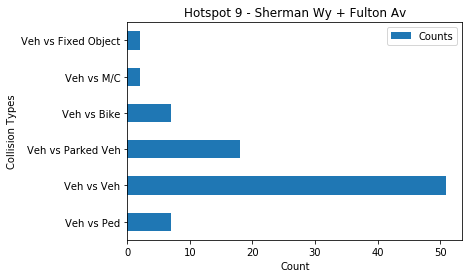

In [72]:
updated9_df.plot(kind="barh")
plt.title('Hotspot 9 - Sherman Wy + Fulton Av')
plt.xlabel("Count")
plt.ylabel("Collision Types")
plt.show
plt.savefig("bar9.png", bbox_inches='tight', dpi=600)

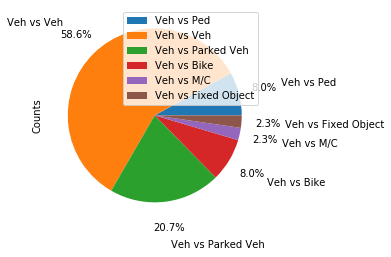

In [59]:
updated9_df.plot(kind="pie", subplots=True, autopct='%1.1F%%', pctdistance = 1.3, labeldistance = 1.5, legend = True)
plt.savefig("pie9.png", bbox_inches='tight', dpi=600)
plt.show()

In [60]:
summary10_df = pd.DataFrame({"Veh vs Ped": hotspot10_MO3003, "Veh vs Veh": hotspot10_MO3004, 
                            "Veh vs Parked Veh":hotspot10_MO3006, "Veh vs Bike": hotspot10_MO3008, 
                           "Veh vs M/C": hotspot10_MO3009, "Veh vs Fixed Object": hotspot10_MO3011},
                 index=[""]).T
updated10_df = summary10_df.rename(columns = {"" : "Counts"})
updated10_df

,Counts
Veh vs Ped,5
Veh vs Veh,62
Veh vs Parked Veh,10
Veh vs Bike,2
Veh vs M/C,4
Veh vs Fixed Object,4


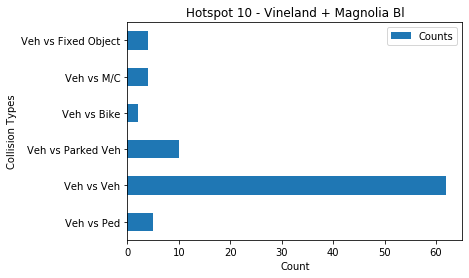

In [73]:
updated10_df.plot(kind="barh")
plt.title('Hotspot 10 - Vineland + Magnolia Bl')
plt.xlabel("Count")
plt.ylabel("Collision Types")
plt.show
plt.savefig("bar10.png", bbox_inches='tight', dpi=600)

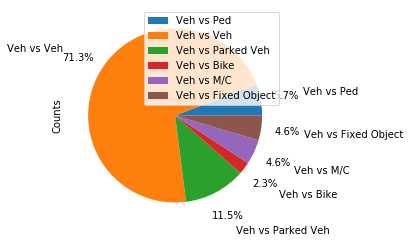

In [62]:
updated10_df.plot(kind="pie", subplots=True, autopct='%1.1F%%', pctdistance = 1.3, labeldistance = 1.5, legend = True)
plt.savefig("pie10.png", bbox_inches='tight', dpi=600)
plt.show()